## Applied Logistic Regression Examples
#### Professor Vincent Nijs
#### Rady School of Management @ UCSD

## Overview

Logistic regression is similar to (multiple) linear regression except that logistic regression is used when the response variable is binary (i.e., assumes only two discrete values). Examples include "yes-no" response variables, such as whether a customer responded to a marketing campaign (or not), whether a person is a homeowner (or not), whether a business goes bankrupt (or not), or whether a person votes guilty (or not guilty). Like linear regression, the explanatory variables can be metric (e.g., age, income, sales units) or categorical (e.g., gender, religion, country).

While the basic concepts in linear and logistic regression are similar, the interpretation of the regression equation and the coefficients are somewhat different. In linear regression, the response variable is continuous (e.g., sales or profits). The linear regression coefficients are multiplied by the values of the explanatory variables to yield a predicted value for the response variable.

In logistic regression, the observed values for the response variable can be represented using a 0-1 dummy variable. The mean of a 0-1 dummy variable is equal to the proportion of observations with a value of 1 and can be interpreted as a probability. Predicted values in a logistic regression will always range between 0 and 1 and can also be interpreted as probabilities.

This notebook provides the code used for all output in the slides used in class.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 100

# get version of pyrsm 0.9.13 or higher
# pip install "pyrsm>=0.9.13"
rsm.__version__

'0.9.13'

In [2]:
biden_county = pd.read_parquet("data/biden_county_2020.parquet")
leadscoring = pd.read_parquet("data/leadscoring.parquet")
cars = pd.read_parquet("data/cars.parquet")
bbb = pd.read_parquet("data/bbb.parquet")

In [3]:
leadscoring

,id,sale,webpageviews,viewedpricing,highrelevancefirm,visitedcareer
0,321,NaN,33,no,yes,no
1,400,NaN,32,no,yes,no
2,303,NaN,18,yes,yes,no
3,606,NaN,26,no,yes,no
4,687,NaN,25,no,yes,no
...,...,...,...,...,...,...
195,439,yes,30,no,yes,no
196,15134,no,16,no,no,no
197,17476,no,9,no,no,no
198,18306,no,13,no,no,yes


In [4]:
leadscoring.sale.value_counts(dropna=False)

sale
no     166
NaN     20
yes     14
Name: count, dtype: int64

You will need a numeric version of the `sale` variable for analysis in Python

In [5]:
leadscoring["sale_yes"] = rsm.ifelse(
    leadscoring.sale == "yes", 1, rsm.ifelse(leadscoring.sale == "no", 0, np.nan)
)

In [6]:
leadscoring

,id,sale,webpageviews,viewedpricing,highrelevancefirm,visitedcareer,sale_yes
0,321,NaN,33,no,yes,no,NaN
1,400,NaN,32,no,yes,no,NaN
2,303,NaN,18,yes,yes,no,NaN
3,606,NaN,26,no,yes,no,NaN
4,687,NaN,25,no,yes,no,NaN
...,...,...,...,...,...,...,...
195,439,yes,30,no,yes,no,1.0
196,15134,no,16,no,no,no,0.0
197,17476,no,9,no,no,no,0.0
198,18306,no,13,no,no,yes,0.0


## How to create predictions

Lets start with a linear regression

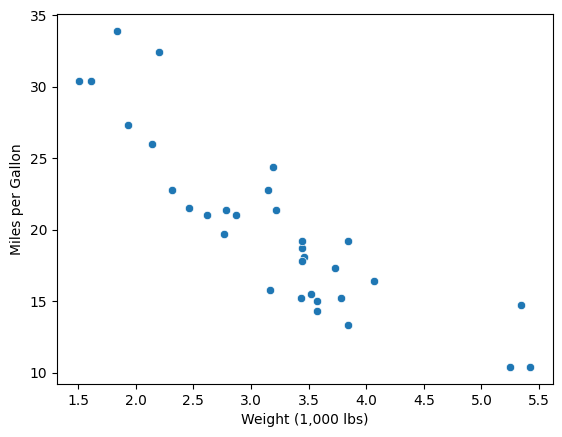

In [7]:
fig = sns.scatterplot(x="wt", y="mpg", data=cars)
fig = fig.set(xlabel="Weight (1,000 lbs)", ylabel="Miles per Gallon")

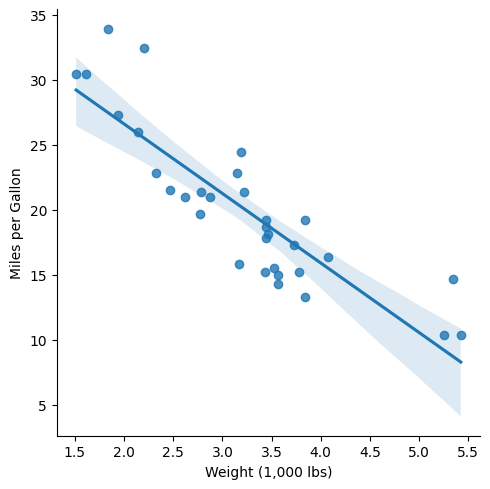

In [8]:
fig = sns.lmplot(x="wt", y="mpg", data=cars, fit_reg=True)
fig = fig.set(xlabel="Weight (1,000 lbs)", ylabel="Miles per Gallon")

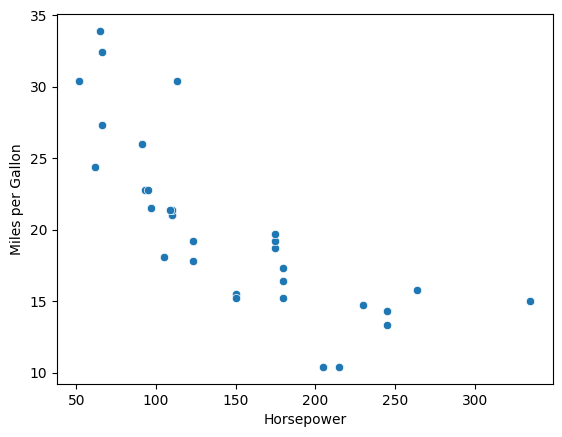

In [9]:
fig = sns.scatterplot(x="hp", y="mpg", data=cars)
fig = fig.set(xlabel="Horsepower", ylabel="Miles per Gallon")

In [10]:
reg = rsm.model.regress(data=cars, rvar="mpg", evar="wt")
reg.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : mpg
Explanatory variables: wt
Null hyp.: the effect of x on mpg is zero
Alt. hyp.: the effect of x on mpg is not zero

           coefficient  std.error  t.value p.value     
Intercept       37.285      1.878   19.858  < .001  ***
wt              -5.344      0.559   -9.559  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.753, Adjusted R-squared: 0.745
F-statistic: 91.375 df(1, 30), p.value < 0.001
Nr obs: 32


In [11]:
reg = rsm.model.regress(data=cars, rvar="mpg", evar=["wt", "hp"])
reg.summary()

Linear regression (OLS)
Data                 : Not provided
Response variable    : mpg
Explanatory variables: wt, hp
Null hyp.: the effect of x on mpg is zero
Alt. hyp.: the effect of x on mpg is not zero

           coefficient  std.error  t.value p.value     
Intercept       37.227      1.599   23.285  < .001  ***
wt              -3.878      0.633   -6.129  < .001  ***
hp              -0.032      0.009   -3.519   0.001   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.827, Adjusted R-squared: 0.815
F-statistic: 69.211 df(2, 29), p.value < 0.001
Nr obs: 32


### BBB logistic regression for targeting

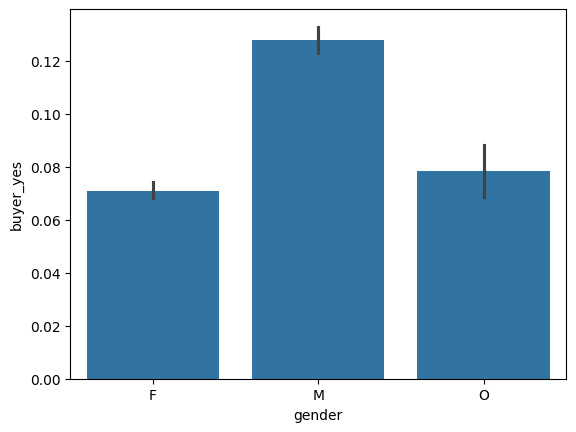

In [12]:
bbb["buyer_yes"] = rsm.ifelse(
    bbb.buyer == "yes", 1, 0
)  # no missing values so this works as intended
fig = sns.barplot(data=bbb, x="gender", y="buyer_yes")

In [13]:
bbb["buyer_yes"] = rsm.ifelse(bbb.buyer == "yes", 1, 0)
perc_buyer = bbb.buyer_yes.mean()

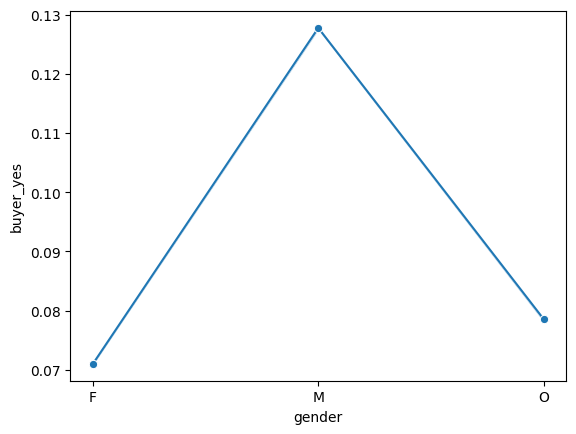

In [14]:
fig = sns.lineplot(
    data=bbb, x="gender", y="buyer_yes", marker="o", errorbar=("ci", False)
)

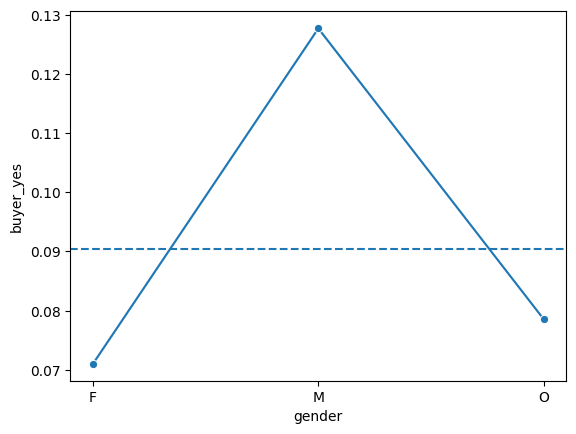

In [15]:
fig = sns.lineplot(
    data=bbb, x="gender", y="buyer_yes", marker="o", errorbar=("ci", False)
)
fig = plt.axhline(y=perc_buyer, linestyle="--")

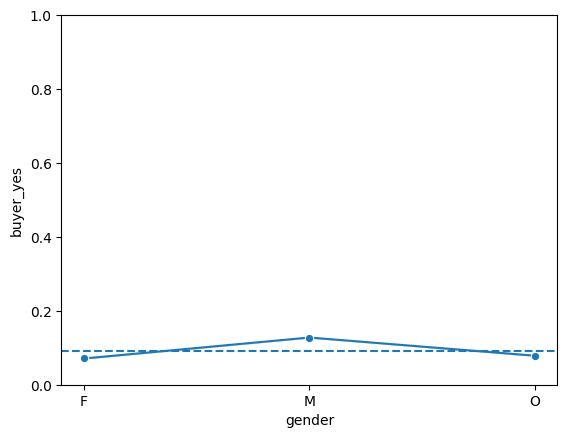

In [16]:
fig = sns.lineplot(
    data=bbb, x="gender", y="buyer_yes", marker="o", errorbar=("ci", False)
)
fig = plt.axhline(y=perc_buyer, linestyle="--")
fig = plt.ylim(0, 1)

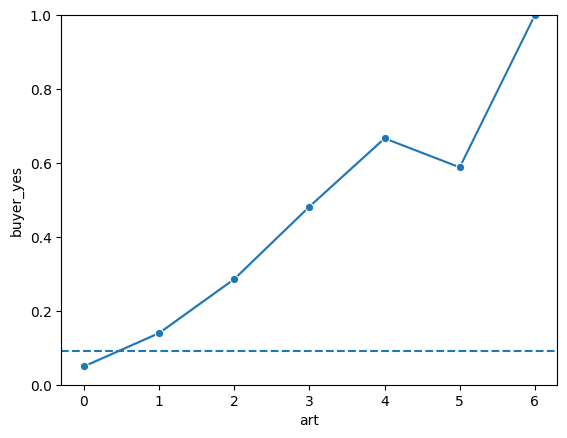

In [17]:
fig = sns.lineplot(data=bbb, x="art", y="buyer_yes", marker="o", errorbar=("ci", False))
fig = plt.axhline(y=perc_buyer, linestyle="--")
fig = plt.ylim(0, 1)

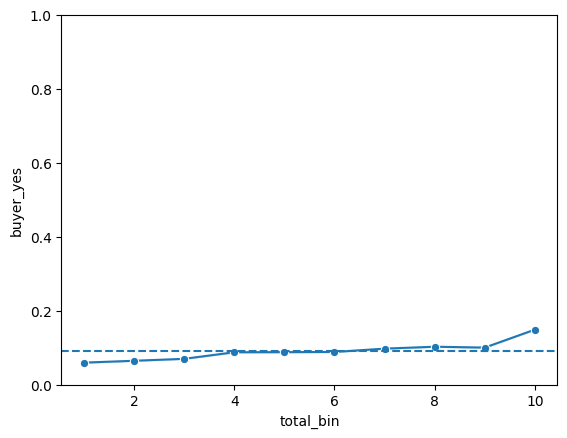

In [18]:
bbb["total_bin"] = rsm.xtile(bbb.total, 10)
fig = sns.lineplot(
    data=bbb, x="total_bin", y="buyer_yes", marker="o", errorbar=("ci", False)
)
fig = plt.axhline(y=perc_buyer, linestyle="--")
fig = plt.ylim(0, 1)

## 2020 Presidential Election US

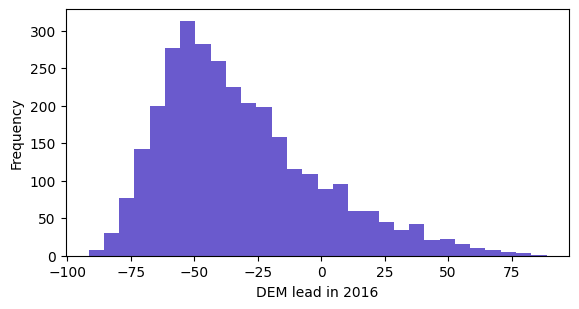

In [19]:
plt.figure(figsize=(6.5, 3.2))
fig = biden_county.dem_lead_2016.plot.hist(bins=30, color="slateblue")
fig = fig.set_xlabel("DEM lead in 2016")

In [20]:
(
    biden_county[["state_name", "county_name", "biden", "dem_lead_2016"]]
    .sort_values("dem_lead_2016")
    .round(2)
    .head(10)
)

,state_name,county_name,biden,dem_lead_2016
2689,Texas,Roberts County,loses,-91.64
2627,Texas,King County,loses,-90.57
1661,Nebraska,Grant County,loses,-88.07
1584,Montana,Garfield County,loses,-86.57
1666,Nebraska,Hayes County,loses,-86.47
1627,Nebraska,Banner County,loses,-86.41
2579,Texas,Glasscock County,loses,-86.21
2665,Texas,Motley County,loses,-85.65
957,Kansas,Wallace County,loses,-85.49
2362,South Dakota,Harding County,loses,-85.31


In [21]:
(
    biden_county[["state_name", "county_name", "biden", "dem_lead_2016"]]
    .sort_values("dem_lead_2016", ascending=False)
    .round(2)
    .head(10)
)

,state_name,county_name,biden,dem_lead_2016
290,District of Columbia,District of Columbia,wins,88.72
1178,Maryland,Prince George's County,wins,80.99
1800,New York,Bronx County,wins,79.13
1828,New York,New York County,wins,77.20
2910,Virginia,Petersburg city,wins,76.96
194,California,San Francisco County,wins,76.09
1186,Maryland,Baltimore city,wins,74.57
1402,Mississippi,Jefferson County,wins,73.80
388,Georgia,Clayton County,wins,71.91
1381,Mississippi,Claiborne County,wins,71.39


In [22]:
(
    biden_county
    .groupby("biden")
    .dem_lead_2016
    .agg(["count", "mean", "min", "max"])
    .round(2)
)

,count,mean,min,max
biden,,,,
loses,2574,-42.87,-91.64,32.80
wins,537,20.45,-13.67,88.72


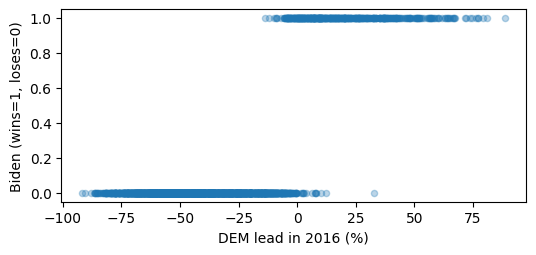

In [23]:
fig = biden_county.plot.scatter(
    x="dem_lead_2016", y="biden_wins", alpha=0.3, figsize=(6, 2.5)
)
fig = fig.set(xlabel="DEM lead in 2016 (%)", ylabel="Biden (wins=1, loses=0)")

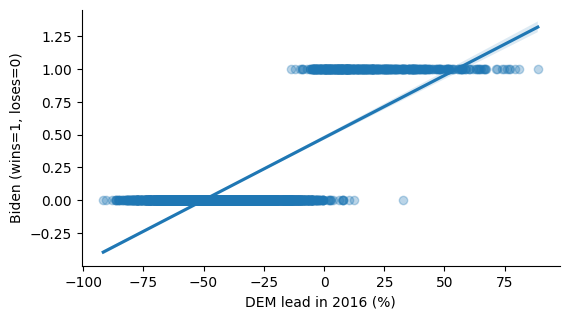

In [24]:
fig = sns.lmplot(
    x="dem_lead_2016",
    y="biden_wins",
    data=biden_county,
    fit_reg=True,
    scatter_kws={"alpha": 0.3},
)
fig.fig.set_figwidth(6)
fig.fig.set_figheight(3)
fig = fig.set(xlabel="DEM lead in 2016 (%)", ylabel="Biden (wins=1, loses=0)")

In [25]:
(
    biden_county[["county_name", "dem_lead_2016"]]
    .sort_values("dem_lead_2016")
    .round(2)
    .head(10)
)

,county_name,dem_lead_2016
2689,Roberts County,-91.64
2627,King County,-90.57
1661,Grant County,-88.07
1584,Garfield County,-86.57
1666,Hayes County,-86.47
1627,Banner County,-86.41
2579,Glasscock County,-86.21
2665,Motley County,-85.65
957,Wallace County,-85.49
2362,Harding County,-85.31


In [26]:
(
    biden_county[["county_name", "dem_lead_2016"]]
    .sort_values("dem_lead_2016", ascending=False)
    .round(2)
    .head(10)
)

,county_name,dem_lead_2016
290,District of Columbia,88.72
1178,Prince George's County,80.99
1800,Bronx County,79.13
1828,New York County,77.20
2910,Petersburg city,76.96
194,San Francisco County,76.09
1186,Baltimore city,74.57
1402,Jefferson County,73.80
388,Clayton County,71.91
1381,Claiborne County,71.39


In [27]:
col_ind = biden_county.columns.isin(["county_name", "dem_lead_2016"])
(biden_county.sort_values("dem_lead_2016").iloc[2620:2630, col_ind].round(2))

,county_name,dem_lead_2016
2059,Lorain County,-0.28
1923,Nash County,-0.25
1739,Hillsborough County,-0.20
561,Teton County,-0.08
2756,Grand County,-0.04
2928,Clark County,0.05
1678,Lancaster County,0.06
737,St. Joseph County,0.21
2785,Orleans County,0.21
1160,Waldo County,0.28


In [28]:
biden_county

,state_name,county_name,county_fips,biden,per_dem,per_gop,dem_lead_2016,biden_wins
0,Alabama,Autauga County,01001,loses,0.239569,0.734358,-49.478934,0
1,Alabama,Baldwin County,01003,loses,0.195653,0.773515,-57.786162,0
2,Alabama,Barbour County,01005,loses,0.466603,0.522714,-5.611165,0
3,Alabama,Bibb County,01007,loses,0.214220,0.769662,-55.544124,0
4,Alabama,Blount County,01009,loses,0.084699,0.898519,-81.381973,0
...,...,...,...,...,...,...,...,...
3107,Wyoming,Sweetwater County,56037,loses,0.194046,0.729428,-53.538203,0
3108,Wyoming,Teton County,56039,wins,0.600608,0.321945,27.866294,1
3109,Wyoming,Uinta County,56041,loses,0.149261,0.764187,-61.492611,0
3110,Wyoming,Washakie County,56043,loses,0.143203,0.783580,-64.037685,0


In [29]:
lr = rsm.model.logistic(
    data={"biden_county": biden_county}, rvar="biden", lev="wins", evar="dem_lead_2016"
)
lr.summary()

Logistic regression (GLM)
Data                 : biden_county
Response variable    : biden
Level                : wins
Explanatory variables: dem_lead_2016
Null hyp.: There is no effect of x on biden
Alt. hyp.: There is an effect of x on biden

                  OR     OR%  coefficient  std.error  z.value p.value     
Intercept      2.453  145.3%         0.90      0.163    5.512  < .001  ***
dem_lead_2016  1.393   39.3%         0.33      0.025   13.392  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.88
Pseudo R-squared (McFadden adjusted): 0.879
Area under the RO Curve (AUC): 0.997
Log-likelihood: -171.958, AIC: 347.917, BIC: 360.002
Chi-squared: 2518.239, df(1), p.value < 0.001 
Nr obs: 3,111


In [30]:
# show model fit information
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.88
Pseudo R-squared (McFadden adjusted): 0.879
Area under the RO Curve (AUC): 0.997
Log-likelihood: -171.958, AIC: 347.917, BIC: 360.002
Chi-squared: 2518.239, df(1), p.value < 0.001 
Nr obs: 3,111


In [31]:
(1 - lr.fitted.llf / lr.fitted.llnull).round(2)

0.88

In [32]:
lr.summary(main=False, fit=False, ci=True)


Confidence intervals:

                  OR    OR%   2.5%  97.5% p.values     
dem_lead_2016  1.393  39.3%  1.327  1.462   < .001  ***


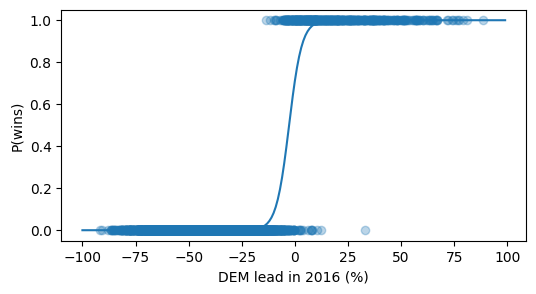

In [33]:
plt.figure(figsize=(6, 3))
new_data = pd.DataFrame().assign(
    intercept=[1] * 200, dem_lead_2016=np.arange(-100, 100)
)
new_data["prob"] = lr.predict(new_data)["prediction"]
plt.plot(new_data.dem_lead_2016, new_data.prob)
plt.scatter(biden_county.dem_lead_2016, biden_county.biden_wins, alpha=0.3)
plt.xlabel("DEM lead in 2016 (%)")
plt.ylabel("P(wins)")
plt.show()

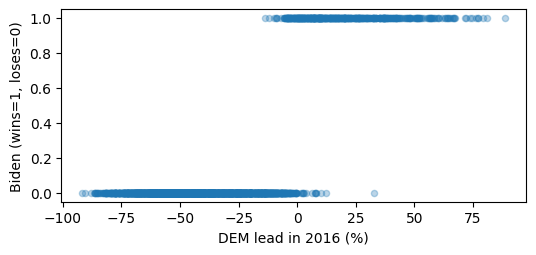

In [34]:
fig = biden_county.plot.scatter(
    x="dem_lead_2016", y="biden_wins", alpha=0.3, figsize=(6, 2.5)
)
fig = fig.set(xlabel="DEM lead in 2016 (%)", ylabel="Biden (wins=1, loses=0)")

In [35]:
lr.predict(biden_county).round(3)

,dem_lead_2016,prediction
0,-49.479,0.000
1,-57.786,0.000
2,-5.611,0.277
3,-55.544,0.000
4,-81.382,0.000
...,...,...
3107,-53.538,0.000
3108,27.866,1.000
3109,-61.493,0.000
3110,-64.038,0.000


In [36]:
lr.predict()["prediction"].round(3)

0       0.000
1       0.000
2       0.277
3       0.000
4       0.000
        ...  
3107    0.000
3108    1.000
3109    0.000
3110    0.000
3111    0.000
Name: prediction, Length: 3112, dtype: float64

In [37]:
pred = lr.predict(
    cmd={"dem_lead_2016": range(-100, 100)}, ci=True
).round(3)
pred

,dem_lead_2016,prediction,2.50%,97.50%
0,-100.0,0.0,0.0,0.0
1,-99.0,0.0,0.0,0.0
2,-98.0,0.0,0.0,0.0
3,-97.0,0.0,0.0,0.0
4,-96.0,0.0,0.0,0.0
...,...,...,...,...
195,95.0,1.0,1.0,1.0
196,96.0,1.0,1.0,1.0
197,97.0,1.0,1.0,1.0
198,98.0,1.0,1.0,1.0


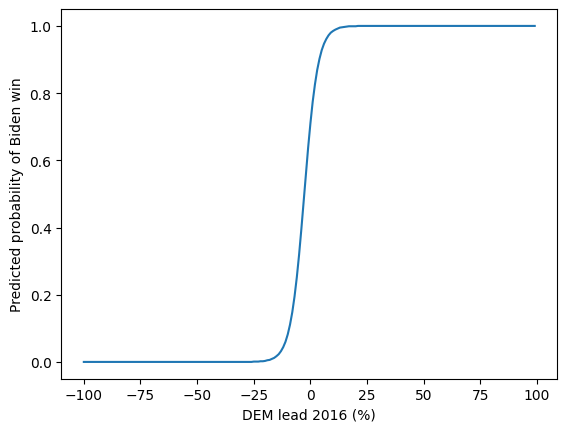

In [38]:
fig = sns.lineplot(x="dem_lead_2016", y="prediction", data=pred)
fig = fig.set(xlabel="DEM lead 2016 (%)", ylabel="Predicted probability of Biden win")

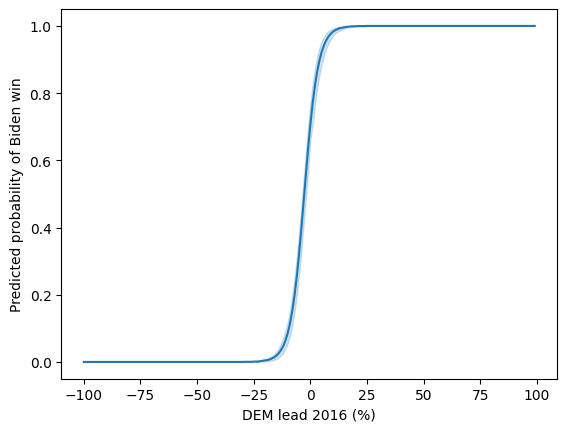

In [39]:
pred_long = pd.melt(pred, id_vars="dem_lead_2016")
fig = sns.lineplot(x="dem_lead_2016", y="value", data=pred_long)
fig = fig.set(xlabel="DEM lead 2016 (%)", ylabel="Predicted probability of Biden win")

## Back to the leadscoring example

In [40]:
leadscoring

,id,sale,webpageviews,viewedpricing,highrelevancefirm,visitedcareer,sale_yes
0,321,NaN,33,no,yes,no,NaN
1,400,NaN,32,no,yes,no,NaN
2,303,NaN,18,yes,yes,no,NaN
3,606,NaN,26,no,yes,no,NaN
4,687,NaN,25,no,yes,no,NaN
...,...,...,...,...,...,...,...
195,439,yes,30,no,yes,no,1.0
196,15134,no,16,no,no,no,0.0
197,17476,no,9,no,no,no,0.0
198,18306,no,13,no,no,yes,0.0


In [41]:
lr = rsm.model.logistic(
    data={"leadscoring": leadscoring},
    rvar="sale",
    lev="yes",
    evar=["webpageviews", "viewedpricing", "highrelevancefirm", "visitedcareer"],
)
lr.summary(fit=False)

Logistic regression (GLM)
Data                 : leadscoring
Response variable    : sale
Level                : yes
Explanatory variables: webpageviews, viewedpricing, highrelevancefirm, visitedcareer
Null hyp.: There is no effect of x on sale
Alt. hyp.: There is an effect of x on sale

                            OR      OR%  coefficient  std.error  z.value p.value     
Intercept                0.000  -100.0%       -10.84      2.400   -4.515  < .001  ***
viewedpricing[yes]      19.260  1826.0%         2.96      1.057    2.798   0.005   **
highrelevancefirm[yes]  10.941   994.1%         2.39      0.834    2.868   0.004   **
visitedcareer[yes]       0.122   -87.8%        -2.10      0.987   -2.130   0.033    *
webpageviews             1.303    30.3%         0.26      0.070    3.803  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [42]:
lr.summary(main=False, fit=True, ci=True)


Pseudo R-squared (McFadden): 0.426
Pseudo R-squared (McFadden adjusted): 0.347
Area under the RO Curve (AUC): 0.943
Log-likelihood: -29.108, AIC: 68.216, BIC: 84.707
Chi-squared: 43.24, df(4), p.value < 0.001 
Nr obs: 200

Confidence intervals:

                              OR      OR%   2.5%    97.5% p.values     
viewedpricing[T.yes]      19.260  1826.0%  2.426  152.895    0.005   **
highrelevancefirm[T.yes]  10.941   994.1%  2.133   56.109    0.004   **
visitedcareer[T.yes]       0.122   -87.8%  0.018    0.846    0.033    *
webpageviews               1.303    30.3%  1.137    1.493   < .001  ***


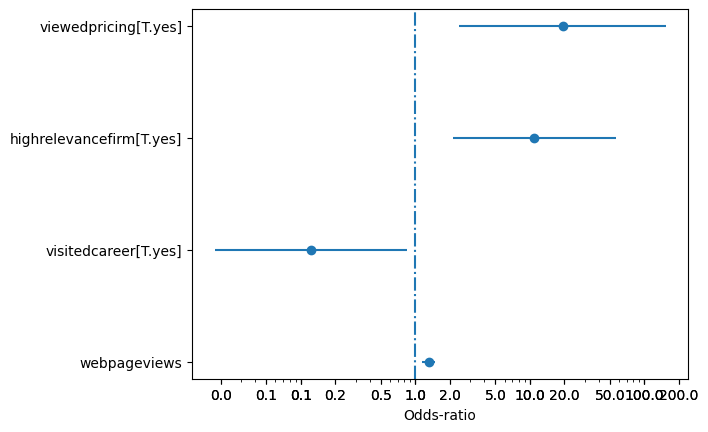

In [43]:
lr.plot("or")

In [44]:
leadscoring.webpageviews.agg(["mean", "std"]).round(2)

mean    20.68
std      9.00
Name: webpageviews, dtype: float64

No plot will be created for id (type object)


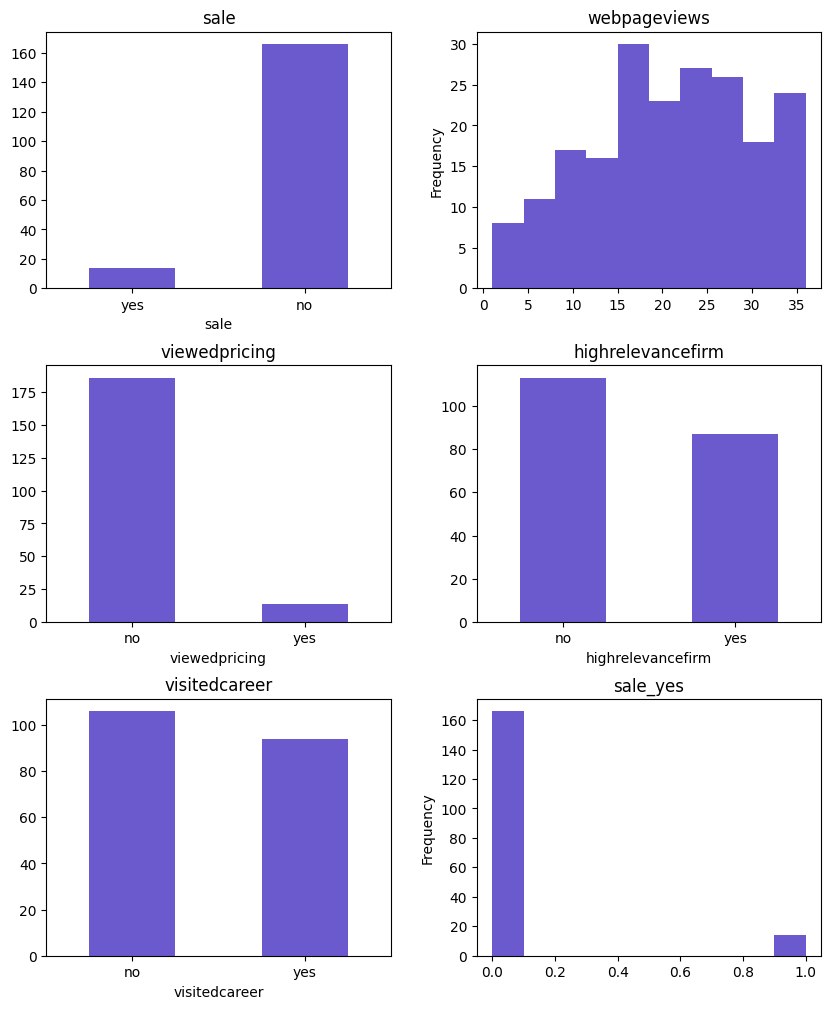

In [45]:
rsm.distr_plot(leadscoring)

## Back to the BBB example

In [46]:
breakeven = 0.5 / (18 - 9 - 3)

In [47]:
bbb["buyer_int"] = rsm.ifelse(
    bbb["buyer"] == "yes", 1, 0
)  # "yes" is set as the "success" outcome

Use logistic regression to generate predictions


In [48]:
lr = rsm.model.logistic(
    data=bbb,
    rvar="buyer",
    lev="yes",
    evar=[
        "gender",
        "last",
        "total",
        "child",
        "youth",
        "cook",
        "do_it",
        "reference",
        "art",
        "geog",
    ],
)
lr.summary()

Logistic regression (GLM)
Data                 : Not provided
Response variable    : buyer
Level                : yes
Explanatory variables: gender, last, total, child, youth, cook, do_it, reference, art, geog
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.093  -90.7%        -2.37      0.050  -47.518  < .001  ***
gender[M]  2.165  116.5%         0.77      0.037   21.065  < .001  ***
gender[O]  1.118   11.8%         0.11      0.074    1.507   0.132     
last       0.910   -9.0%        -0.09      0.003  -33.916  < .001  ***
total      1.001    0.1%         0.00      0.000    5.626  < .001  ***
child      0.830  -17.0%        -0.19      0.017  -10.759  < .001  ***
youth      0.893  -10.7%        -0.11      0.026   -4.332  < .001  ***
cook       0.763  -23.7%        -0.27      0.017  -15.778  < .001  ***
do_it      0.583  -41.7%        -0.54      0.027  -19.992  < .

In [49]:
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.205
Pseudo R-squared (McFadden adjusted): 0.205
Area under the RO Curve (AUC): 0.812
Log-likelihood: -12059.992, AIC: 24143.985, BIC: 24249.822
Chi-squared: 6235.48, df(11), p.value < 0.001 
Nr obs: 50,000


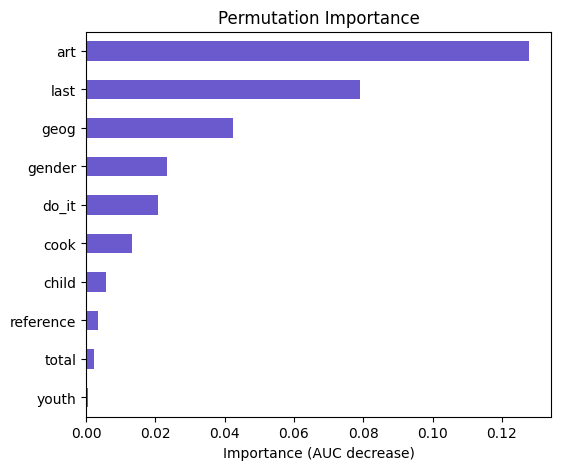

In [50]:
lr.plot("vimp")

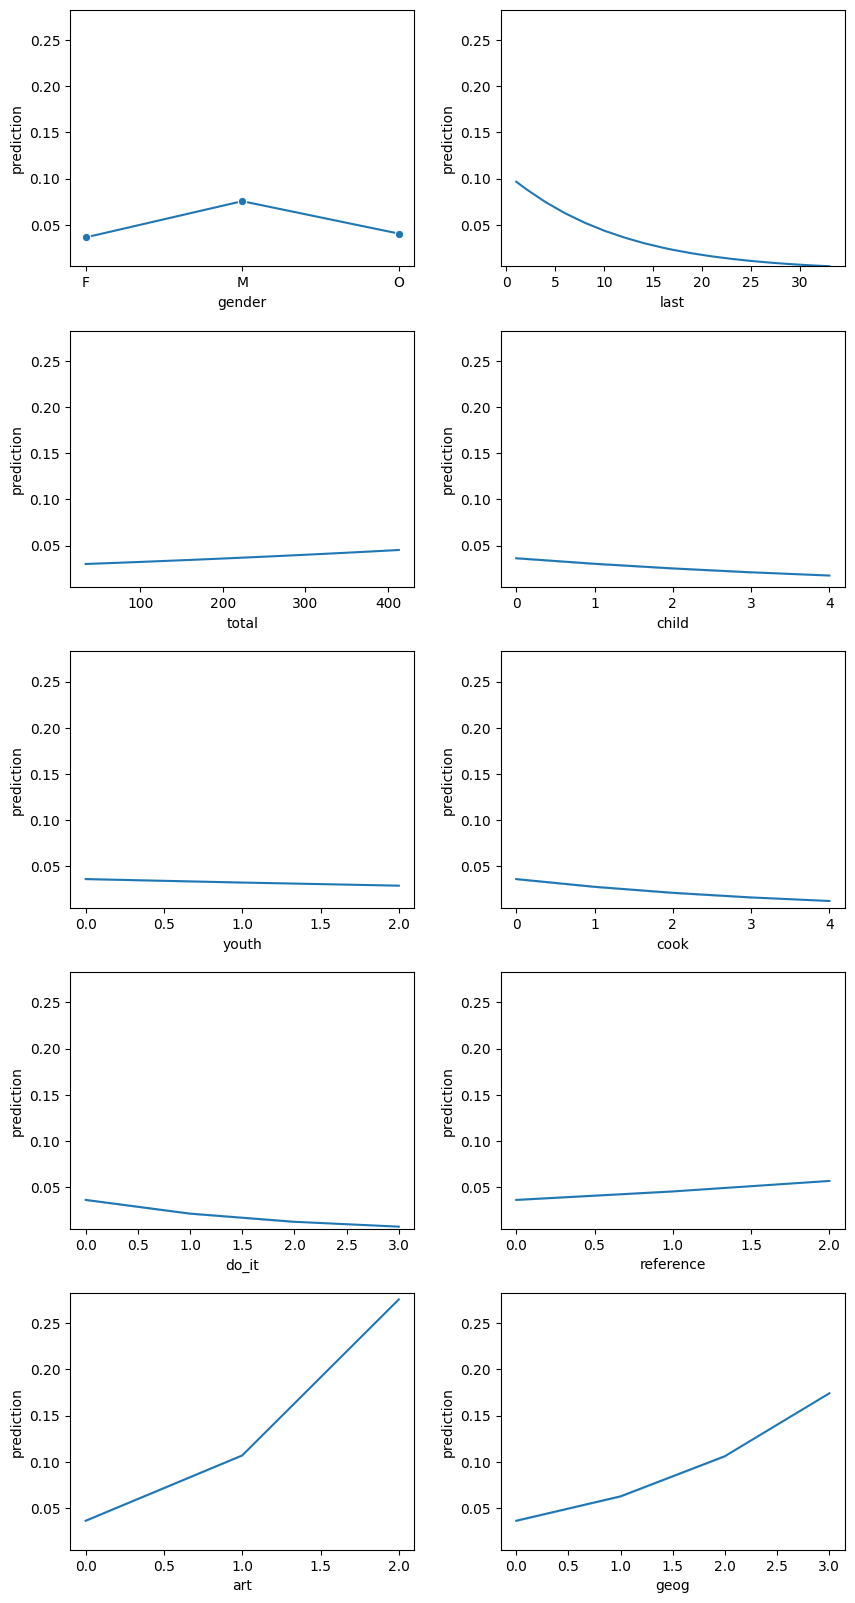

In [51]:
lr.plot("pred")

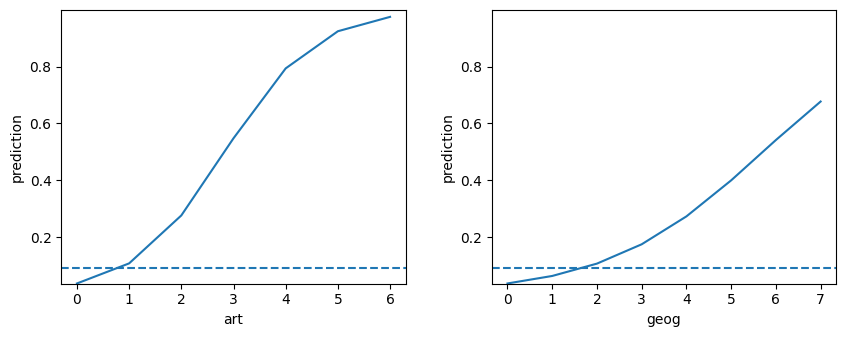

In [52]:
lr.plot("pred", incl=["art", "geog"], hline=True, minq=0, maxq=1)

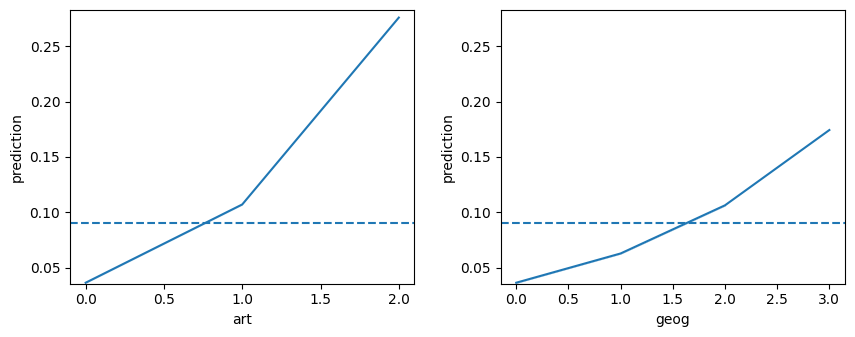

In [53]:
lr.plot("pred", incl=["art", "geog"], hline=True, minq=0.025, maxq=0.975)